In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [2]:
def getData():
    return pd.read_csv("dataframe_exercicio_clusterizacao_RFM.csv")

In [3]:
df = getData()

In [4]:
df

,user,rec,freq,valor
0,1,15.0,7.0,196.881015
1,2,51.0,6.0,162.408892
2,3,80.0,5.0,180.158644
3,4,38.0,4.0,156.048130
4,5,19.0,6.0,164.052067
...,...,...,...,...
1007,1008,50.0,6.0,116.867455
1008,1009,72.0,4.0,94.807854
1009,1010,50.0,5.0,99.187523
1010,1011,81.0,2.0,66.581900


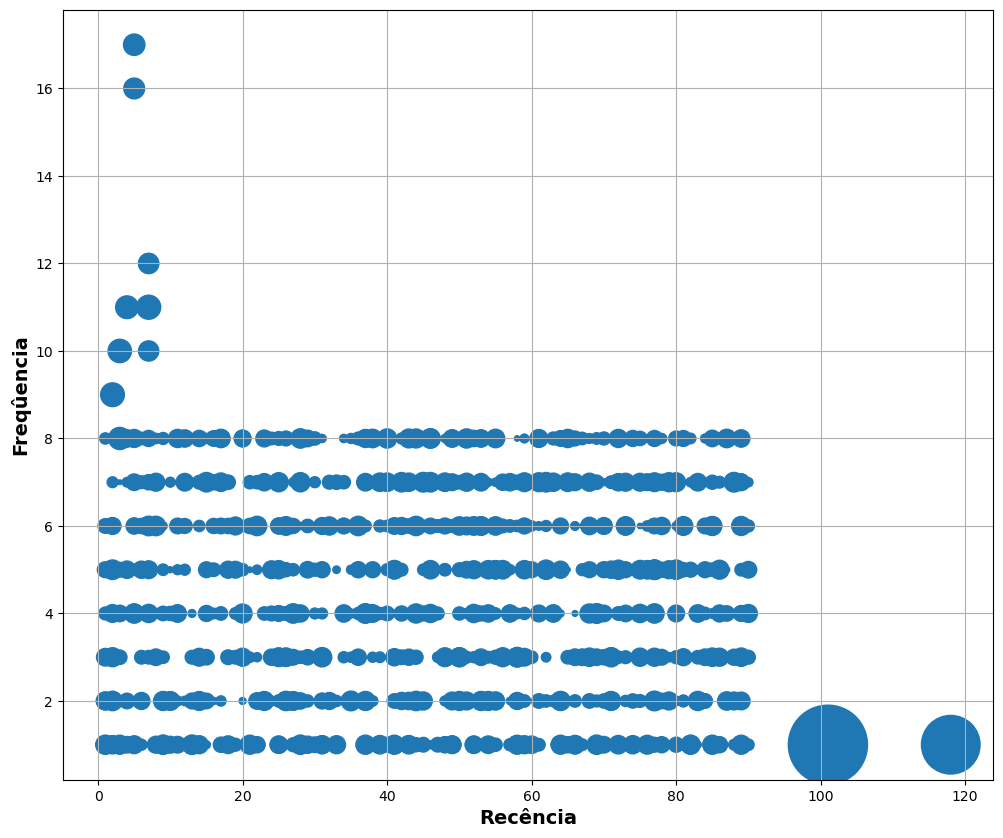

In [5]:
plt.figure(figsize=[12,10])
plt.scatter(df.rec, df.freq,df.valor)
plt.xlabel("Recência", fontsize = 14, fontweight = 'bold')
plt.ylabel("Freqûencia", fontsize = 14, fontweight = 'bold')
plt.grid()
plt.show()

In [6]:
print(df.rec.mean())
print(df.freq.mean())
print(df.valor.mean())

45.06422924901186
4.524703557312253
109.56891547765515


In [35]:
df2 = df.loc[(df.rec > 45)&(df.freq > 4)&(df.valor > 109)]

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
ss = StandardScaler()

In [9]:
X = df.rec.values.reshape(-1,1)
Y = df.freq.values.reshape(-1,1)
W = df.valor.values.reshape(-1,1)

In [10]:
ss.fit(X)

StandardScaler()

In [11]:
ss.fit(Y)

StandardScaler()

In [12]:
ss.fit(W)

StandardScaler()

In [13]:
A = np.c_[X,Y]

In [14]:
km =KMeans(n_clusters=3)

In [15]:
km.fit(A)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [16]:
km.cluster_centers_

array([[48.22560976,  4.61280488],
       [16.12266667,  4.496     ],
       [76.83171521,  4.46601942]])

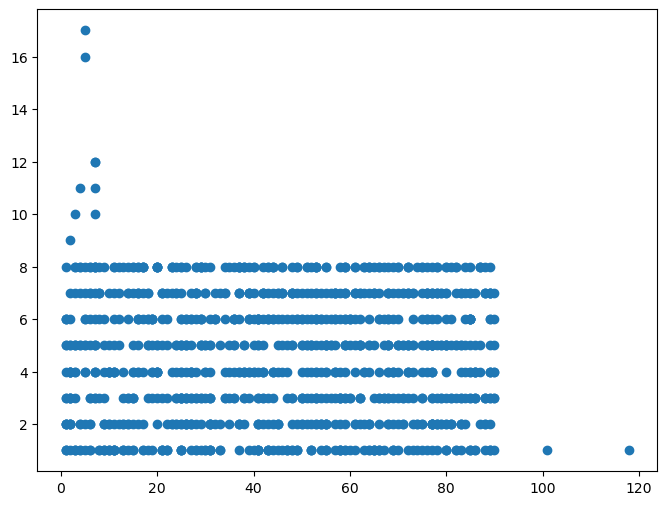

In [17]:
plt.figure(figsize=[8,6])
plt.scatter(A[:, 0], A[:, 1])
plt.show()

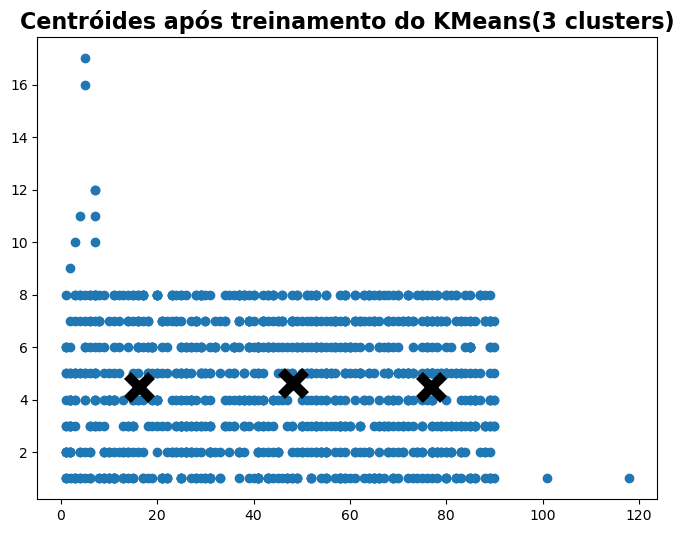

In [18]:
plt.figure(figsize=[8,6])
plt.scatter(A[:, 0], A[:, 1])
plt.title("Centróides após treinamento do KMeans(3 clusters)", fontsize = 16, fontweight = 'bold')
for centr in km.cluster_centers_:
    plt.scatter(centr[0], centr[1], s = 300, marker = 'x', c = 'black', lw = 7)
plt.show()

In [18]:
km.predict(A)

array([1, 0, 2, ..., 0, 2, 1])

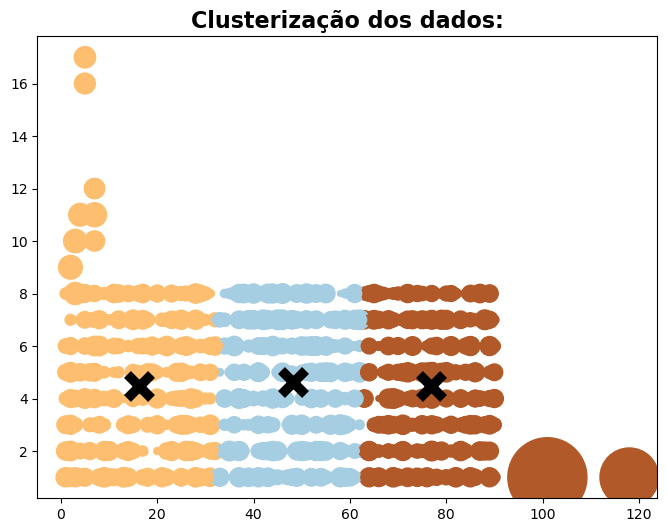

In [19]:
plt.figure(figsize=[8,6])
plt.title("Clusterização dos dados:", fontsize = 16, fontweight = 'bold')
plt.scatter(A[:, 0], A[:, 1],W, c = km.predict(A), cmap = plt.cm.Paired)
for centr in km.cluster_centers_:
    plt.scatter(centr[0], centr[1], s = 300, marker = 'x', c = 'black', lw = 7)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_k

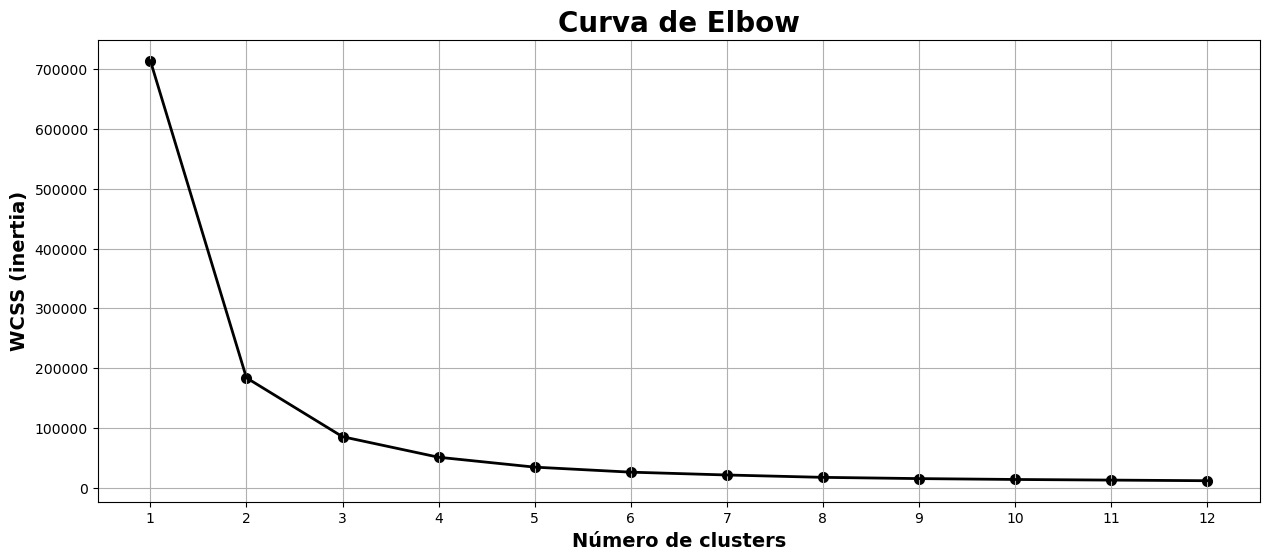

In [20]:
lista_inertias = []
for i in range(1, 13):
    km = KMeans(n_clusters=i)
    km.fit(A)
    lista_inertias.append(km.inertia_)
    
    
#plotando a curva de elbow    
plt.figure(figsize=[15,6])
plt.title("Curva de Elbow", fontsize = 20, fontweight = 'bold')
plt.xlabel("Número de clusters", fontsize = 14, fontweight = 'bold')
plt.ylabel("WCSS (inertia)", fontsize = 14, fontweight = 'bold')
plt.plot(range(1, 1+len(lista_inertias)), lista_inertias, c = 'black', lw = 2)
plt.scatter(range(1, 1+len(lista_inertias)), lista_inertias, c = 'black', lw = 2)
plt.xticks(range(1,1+len(lista_inertias)))
plt.grid()
plt.show()

In [21]:
df.head()

,user,rec,freq,valor
0,1,15.0,7.0,196.881015
1,2,51.0,6.0,162.408892
2,3,80.0,5.0,180.158644
3,4,38.0,4.0,156.048130
4,5,19.0,6.0,164.052067


In [22]:
df1 = ss.fit_transform(df.values[:, 1:])

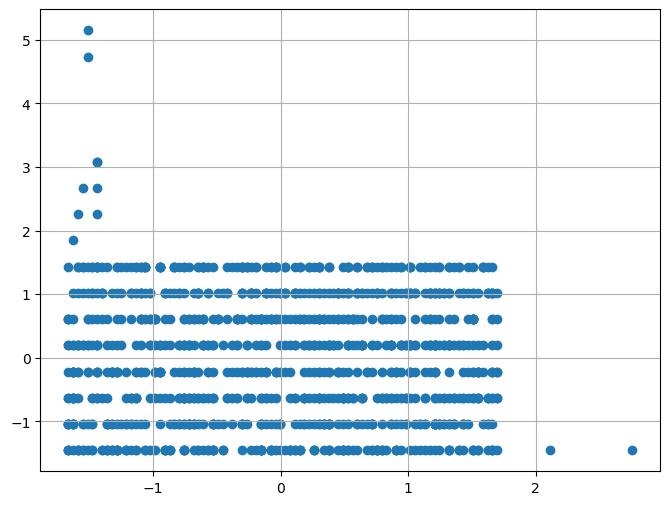

In [34]:
plt.figure(figsize=[8,6])
plt.scatter(df1[:,0], df1[:, 1])
plt.grid()
plt.show()

In [24]:
df.corr()

,user,rec,freq,valor
user,1.000000,0.003080,-0.000657,-0.019787
rec,0.003080,1.000000,-0.019119,0.090110
freq,-0.000657,-0.019119,1.000000,-0.061690
valor,-0.019787,0.090110,-0.061690,1.000000


C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_k

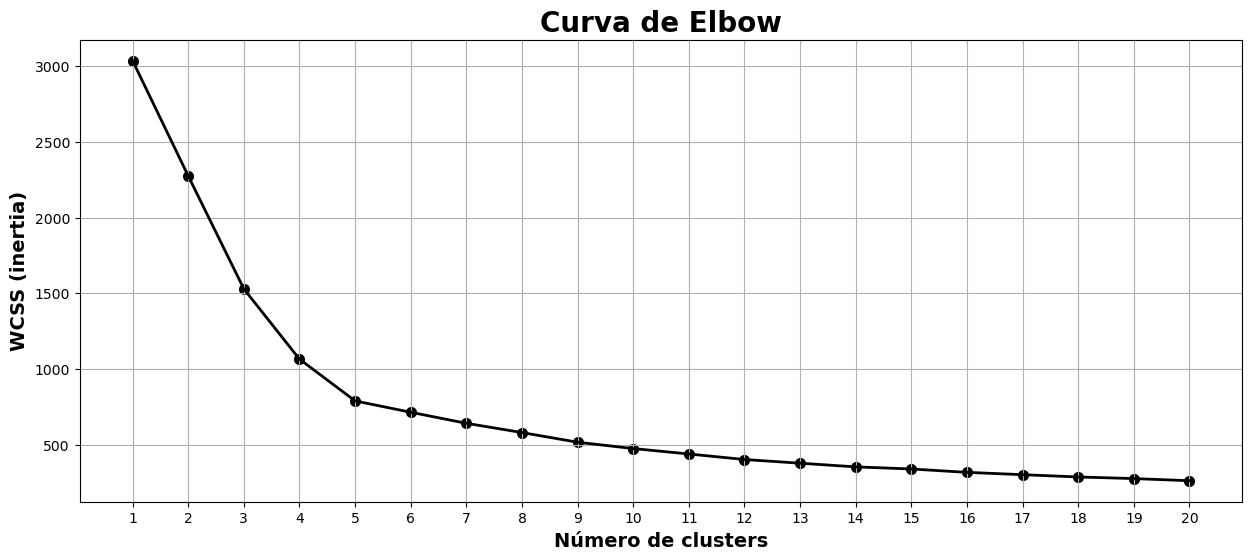

In [25]:
l=[]
for k in range(1, 21):
    km = KMeans(n_clusters=k)
    km.fit(df1)
    l.append(km.inertia_)

plt.figure(figsize=[15,6])
plt.title("Curva de Elbow", fontsize = 20, fontweight = 'bold')
plt.xlabel("Número de clusters", fontsize = 14, fontweight = 'bold')
plt.ylabel("WCSS (inertia)", fontsize = 14, fontweight = 'bold')
plt.plot(range(1, 1+len(l)), l, c = 'black', lw = 2)
plt.scatter(range(1, 1+len(l)), l, c = 'black', lw = 2)
plt.xticks(range(1,1+len(l)))
plt.grid()
plt.show()

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_k

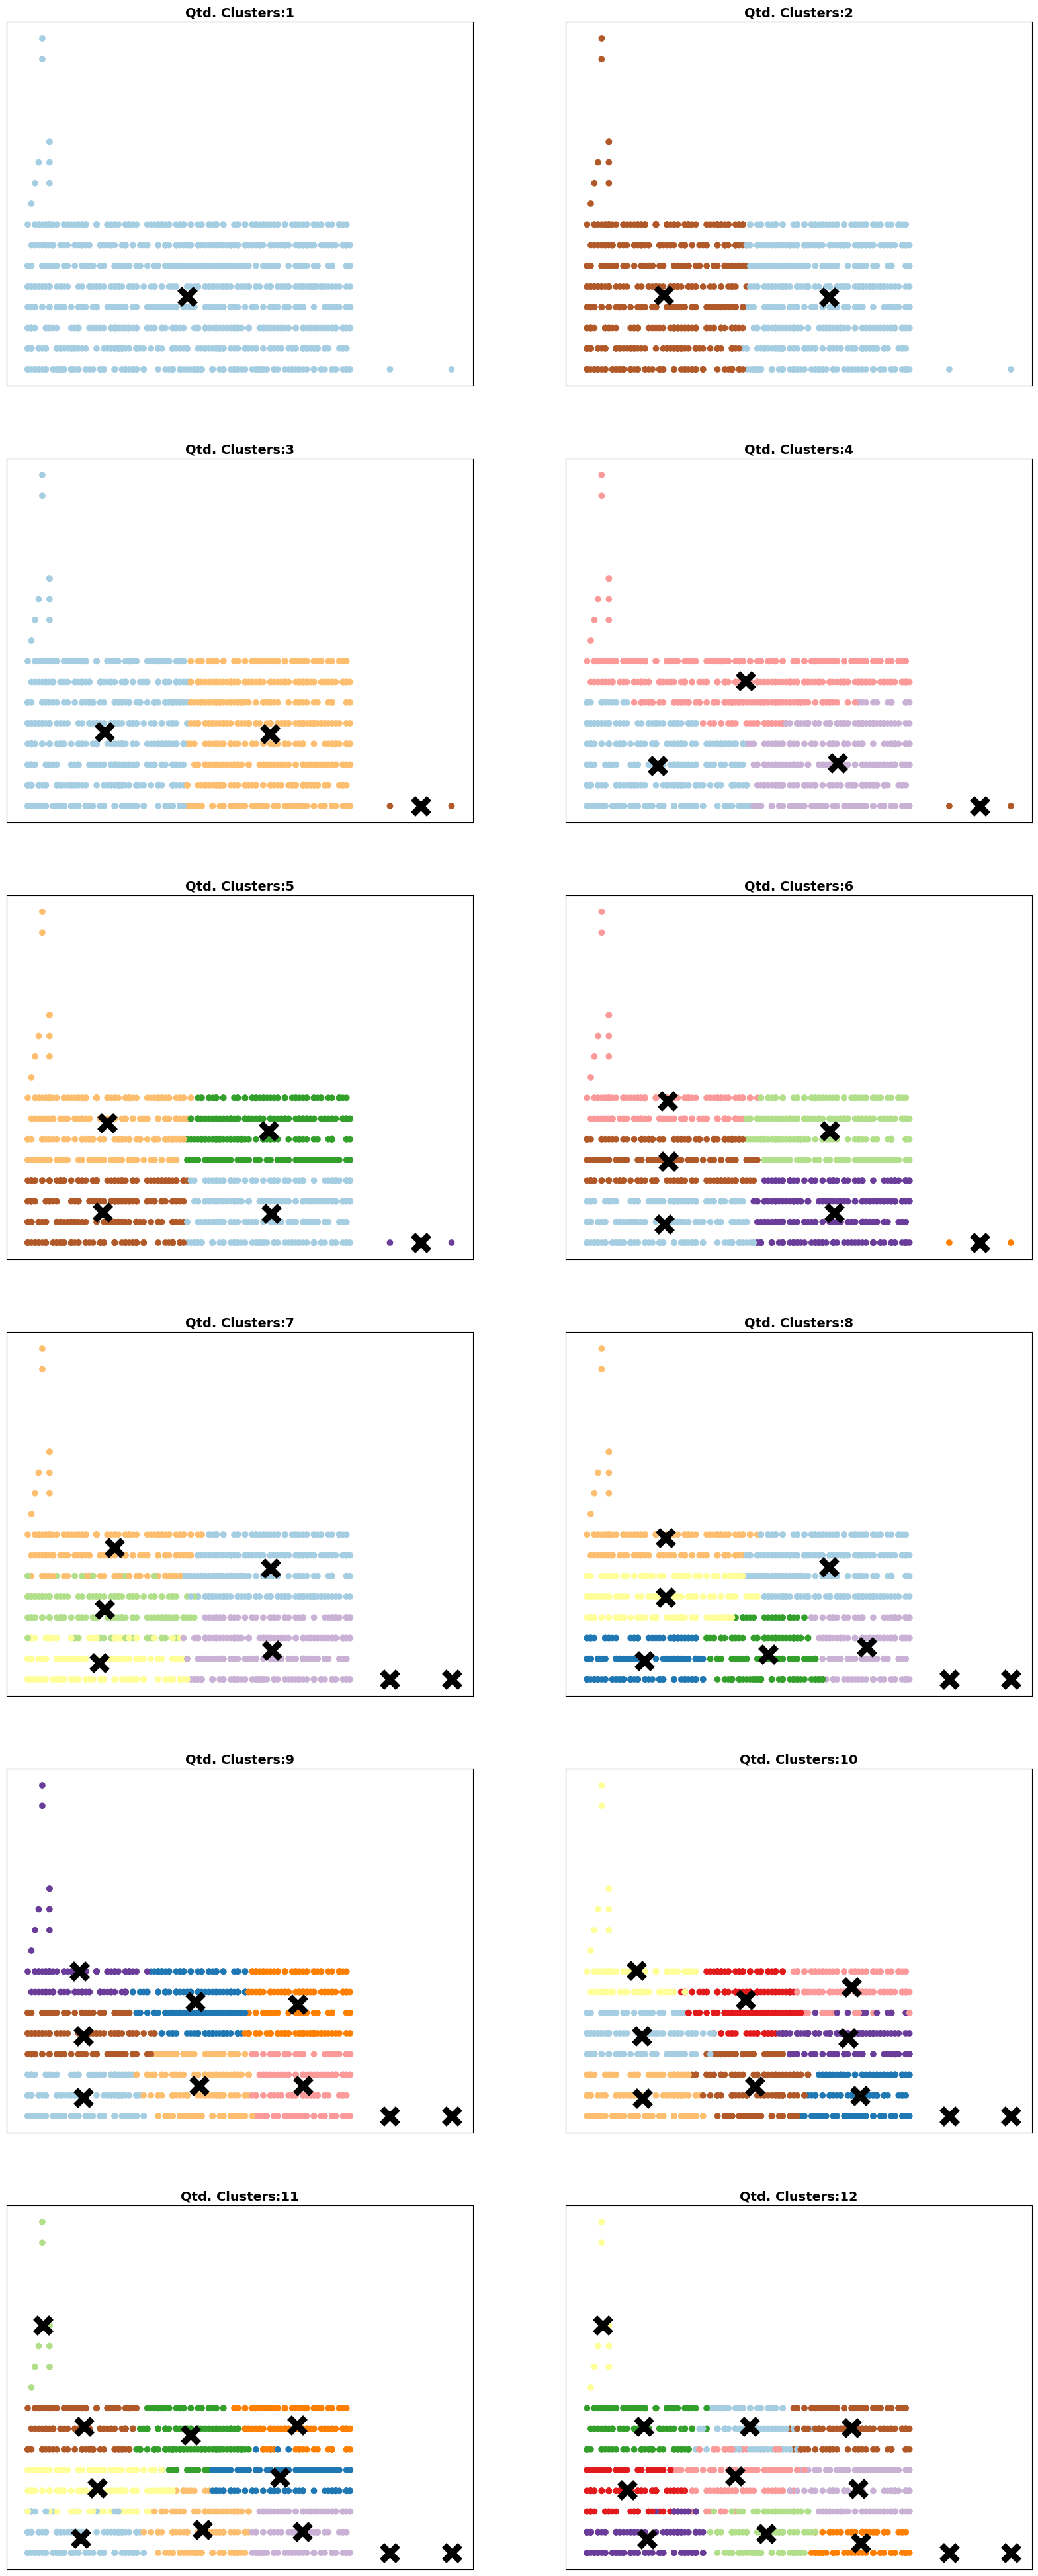

In [32]:
plt.figure(figsize=[20,50])

for k in range(1, 13):
    km = KMeans(n_clusters=k)
    km.fit(df1)
    plt.subplot(6,2,k)
    plt.title("Qtd. Clusters:" + str(k), fontsize = 14, fontweight = 'bold')
    plt.scatter(df1[:, 0], df1[:, 1], c = km.predict(df1), cmap = plt.cm.Paired)
    for centr in km.cluster_centers_:
        plt.scatter(centr[0], centr[1], s = 300, marker = 'x', c = 'black', lw = 7)
    plt.xticks([])
    plt.yticks([])
plt.show()

In [26]:
km = KMeans(n_clusters=5).fit(df1)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [27]:
df['km5'] = km.predict(df1)
df

,user,rec,freq,valor,km5
0,1,15.0,7.0,196.881015,4
1,2,51.0,6.0,162.408892,1
2,3,80.0,5.0,180.158644,1
3,4,38.0,4.0,156.048130,0
4,5,19.0,6.0,164.052067,4
...,...,...,...,...,...
1007,1008,50.0,6.0,116.867455,1
1008,1009,72.0,4.0,94.807854,3
1009,1010,50.0,5.0,99.187523,1
1010,1011,81.0,2.0,66.581900,3


In [28]:
clientes_0 = df.loc[df.km5 == 0]
clientes_1 = df.loc[df.km5 == 1]
clientes_2 = df.loc[df.km5 == 2]
clientes_3 = df.loc[df.km5 == 3]
clientes_4 = df.loc[df.km5 == 4]


In [29]:
print(round(clientes_0.rec.mean(),1),('****'),round(clientes_0.freq.mean(),1),('****'),round(clientes_0.valor.mean(),1))
print(round(clientes_1.rec.mean(),1),('****'),round(clientes_1.freq.mean(),1),('****'),round(clientes_1.valor.mean(),1))
print(round(clientes_2.rec.mean(),1),('****'),round(clientes_2.freq.mean(),1),('****'),round(clientes_2.valor.mean(),1))
print(round(clientes_3.rec.mean(),1),('****'),round(clientes_3.freq.mean(),1),('****'),round(clientes_3.valor.mean(),1))
print(round(clientes_4.rec.mean(),1),('****'),round(clientes_4.freq.mean(),1),('****'),round(clientes_4.valor.mean(),1))

21.6 **** 2.5 **** 105.9
67.5 **** 6.4 **** 104.1
109.5 **** 1.0 **** 2510.6
68.2 **** 2.4 **** 107.9
22.9 **** 6.8 **** 101.4


In [30]:
print(clientes_0.shape)
print(clientes_1.shape)
print(clientes_2.shape)
print(clientes_3.shape)
print(clientes_4.shape)

(259, 5)
(260, 5)
(2, 5)
(243, 5)
(248, 5)


até aqui da para ver que faz sentido roda o KMeans(n_clusters=5) para forma 5 grupos de clientes, dividiu bem para cada grupo 
e ao meu ver o grupo que tem o numero da Recência menor e a Freqûencia maior e uma media de Valor monetário nao muito distantes 
dos outros grupos, este são os melhores clientes, mesmo que o valor medio é menor, mais ao longo prazo sendo que este grupo demora menos para voltar a compra e são os que em um espaço de tempo os que mais frequentam, são os que vão da mais lucro 

e tem um grupo dentre os outros tem o valor medio gasto maior, mas este eu nao consideraria um bom grupo pois a frequencia é de 1 e faz mais de 100 dias desda sua ultima compra, este acredito que seja cliente passageiros, aqueles que nao são fieis 

e porque não tem a aula do DBSCAN?